<a href="https://colab.research.google.com/github/TrentO31/Portfolio/blob/main/Portfolio_California_Housing_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to Machine Learning Housing Corporation! The first task you are asked to
perform is to build a model of housing prices in California using the California census data. This data has metrics such as the population, median income, median housing price, and so on for each block group in California.

Purpose: Determing housing prices in California using California Cenus Data in order to help benefit the company ...

Skills: Data Maniplation, Data Visualization, Data Analysis, Machine Learning, Pipeline Creation,Regression Modeling

Current status: Company has employed many experts to gather data, but the data does not include median house price.

#download the data


In [256]:
#Importing the data needed
import os
import tarfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
  if not os.path.isdir(housing_path):
    os.makedirs(housing_path)
  tgz_path = os.path.join(housing_path, "housing.tgz")
  urllib.request.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()

In [257]:
#Reading CSV version of file
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv(csv_path)


In [258]:
fetch_housing_data()

In [259]:
#Viewing the top five rows to see degree of detail of data
housing = load_housing_data()
housing.head()
#10 values, though there is not an identification row, that will need to be added later

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [260]:
#Viewing the number of entries, non-null columns, and data types
housing.info()
#There are 9 columns that are float64 type and one that is an object type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [261]:
#Viewing what are the counts of the object data type
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [262]:
#Taknig a view of the statistical summary of numerical columns
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [263]:
#creating a function in order to view give the skew of the data
def check_skewness(housing):
    # Loop through each column in the DataFrame
    for column in housing.select_dtypes(include=['float64', 'int64']).columns: #including the nuerical columns

        median = housing[column].median() #saving the medians of the columns as median for comparison against mean for skew

        mean = housing[column].mean() #saving the mean of the columns as median for comparison against median for skew

        # Check if the median is greater than or less than the mean
        if median > mean:
            skew_direction = "skewed to the left"
        elif median < mean:
            skew_direction = "skewed to the right"
        else:
            skew_direction = "symmetric"

        # Print the column name and the skewness direction
        print(f"- {column} is {skew_direction}")


In [264]:
#Inputting Housing dataset into Check_Skewness function
check_skewness(housing)

- longitude is skewed to the left
- latitude is skewed to the right
- housing_median_age is skewed to the left
- total_rooms is skewed to the right
- total_bedrooms is skewed to the right
- population is skewed to the right
- households is skewed to the right
- median_income is skewed to the right
- median_house_value is skewed to the right


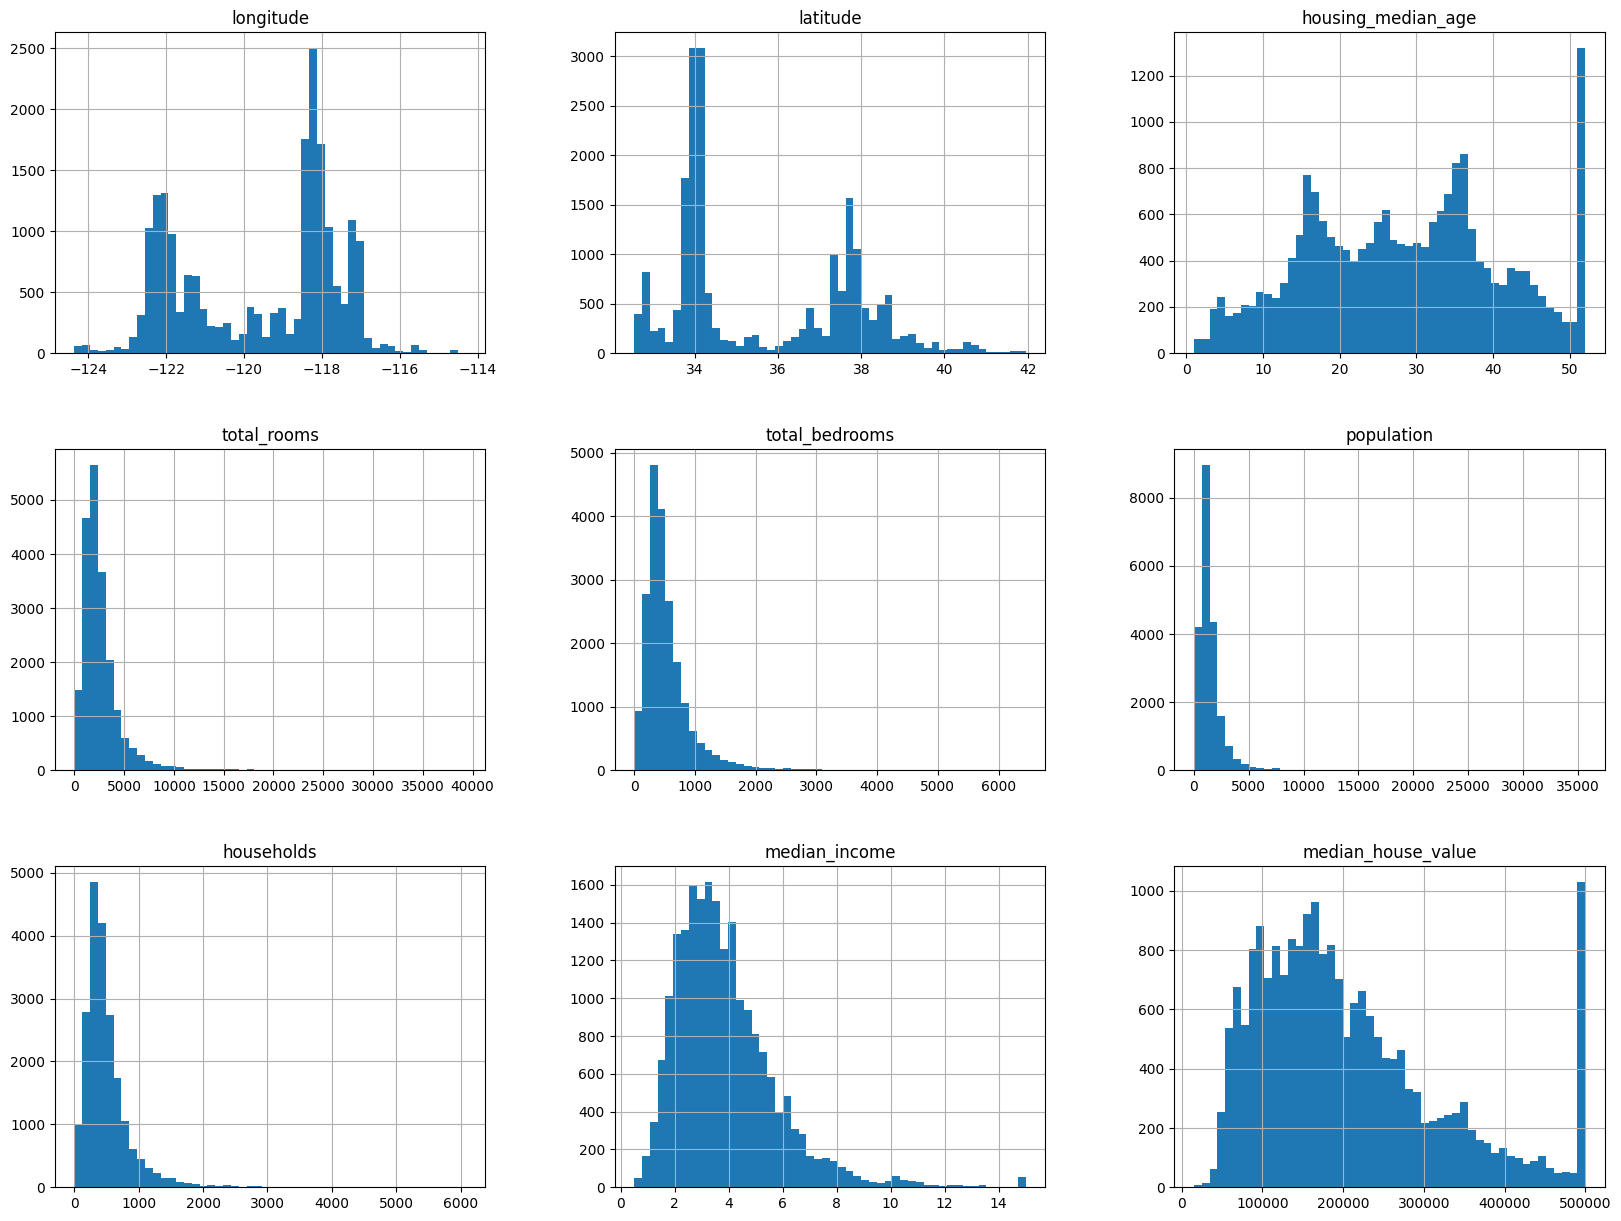

In [265]:
#Visualizing the numerical data columns
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [266]:
#importing seaborn and abbreviating it as SNS
import seaborn as sns
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined


    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=housing, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=housing, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=housing, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        housing[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        housing[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [267]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
#creating a dataset that only has the numeric columns for data visualization
numeric_columns = housing.select_dtypes(include=np.number).columns.tolist()

<ipython-input-266-9d3ef1b9057e>:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-266-9d3ef1b9057e>:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-266-9d3ef1b9057e>:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-266-9d3ef1b9057e>:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-266-9d3ef1b9057e>:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-266-9d3ef1b9057e>:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-266-9d3ef1b9057e>:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(
<ipython-input-266-9d3ef1b9057e>:26: UserWarning: Ignoring `palette` because no `hue` vari

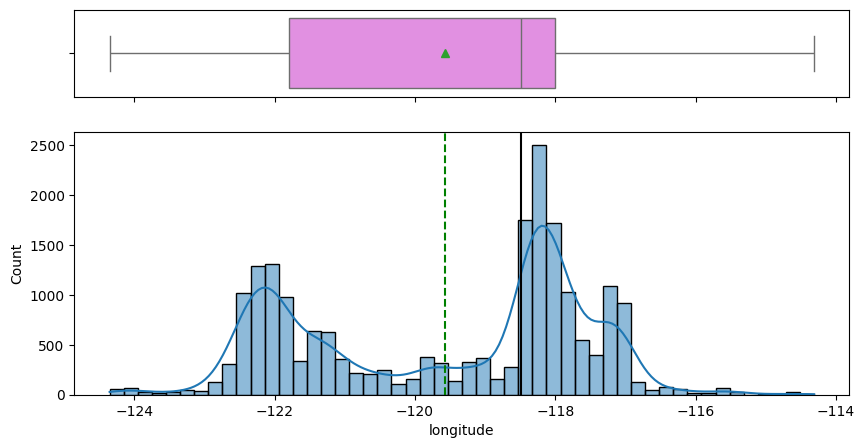

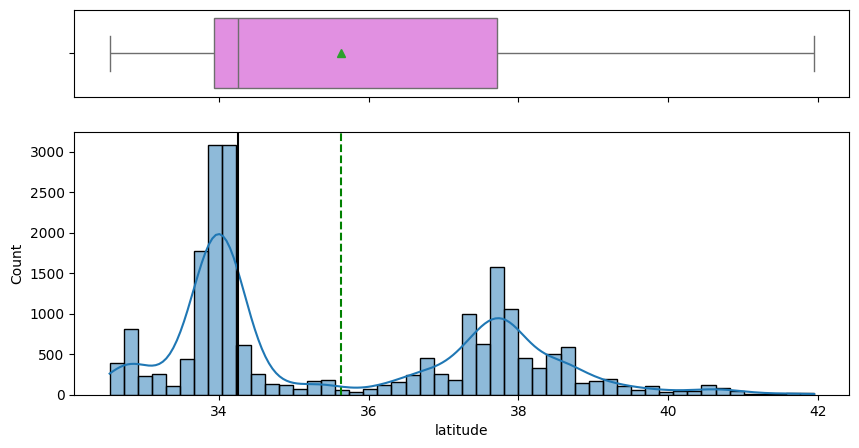

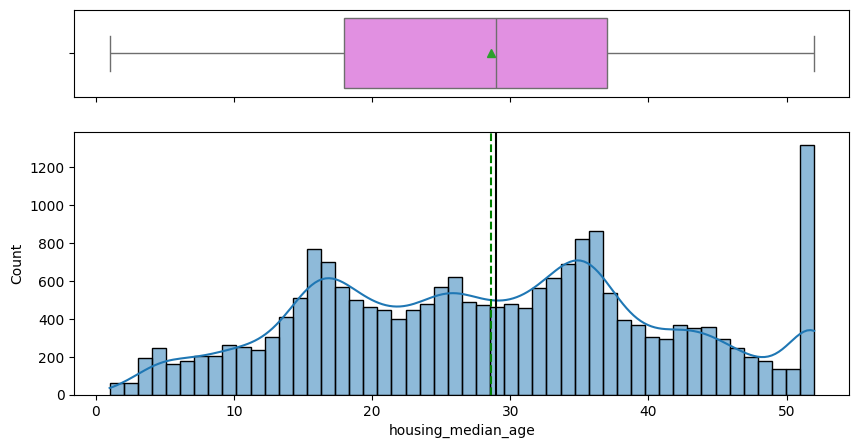

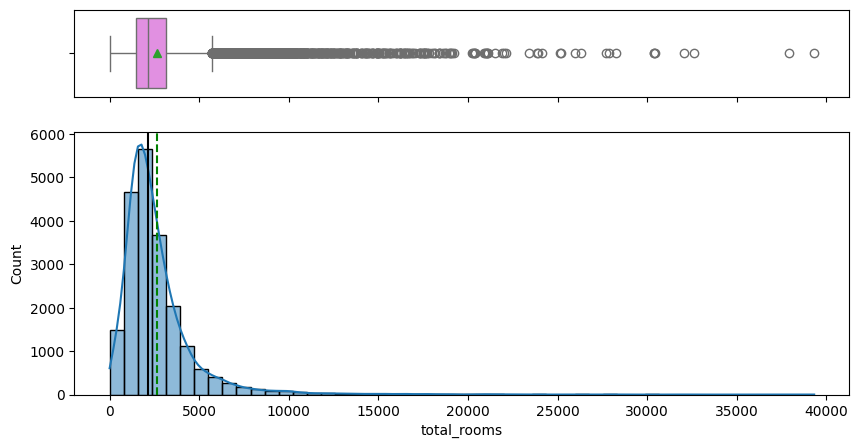

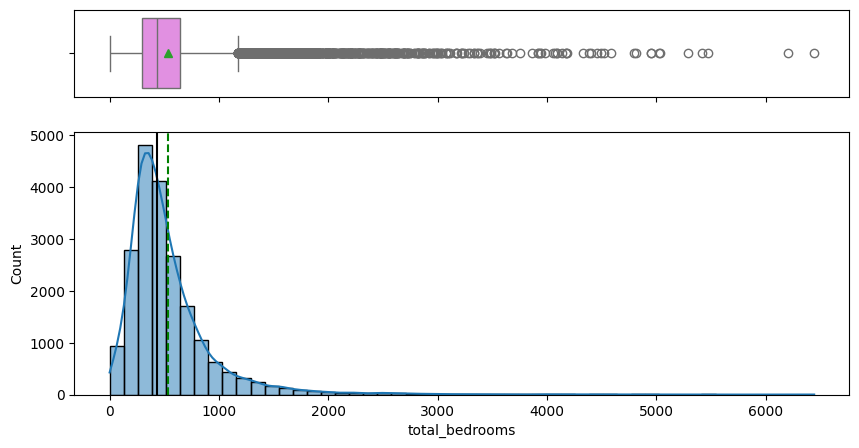

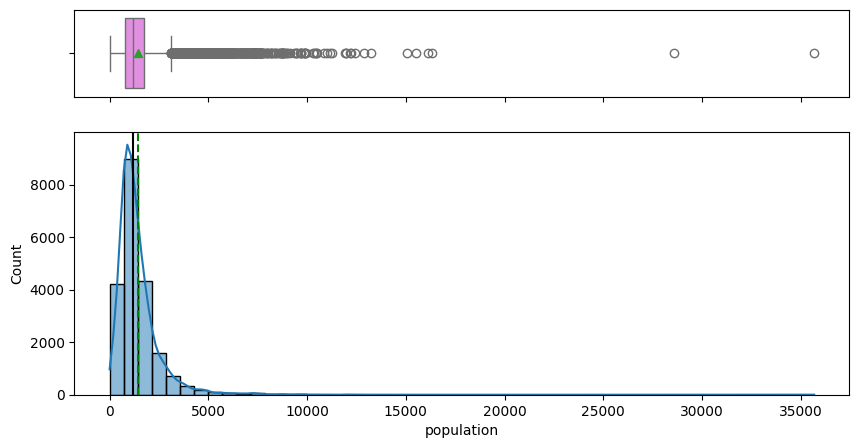

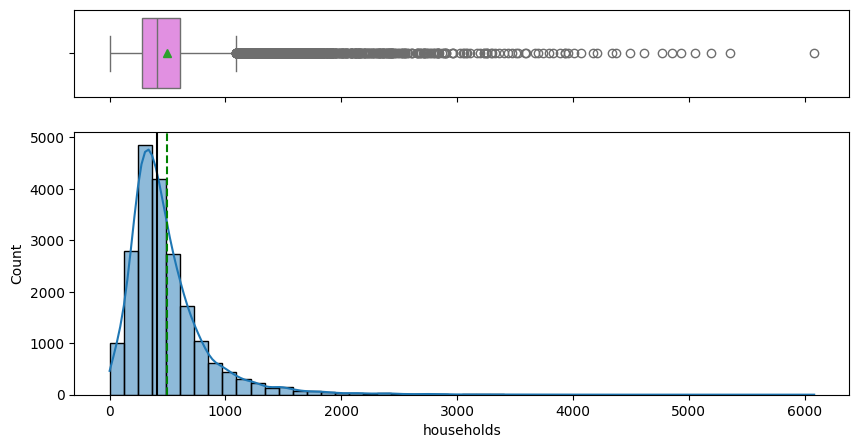

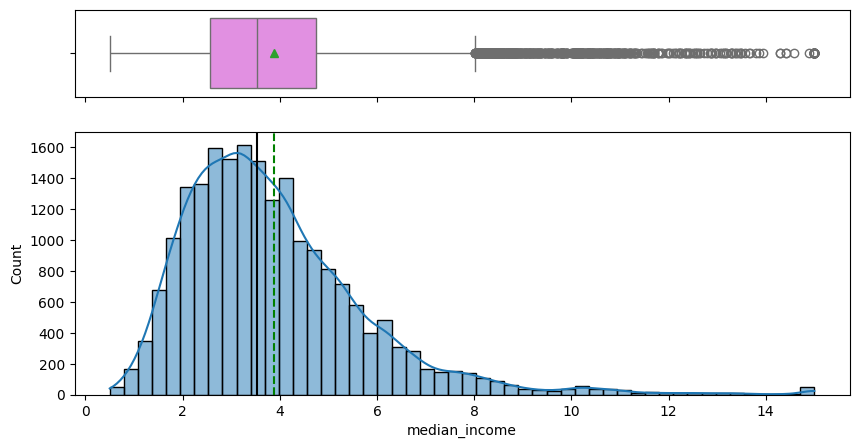

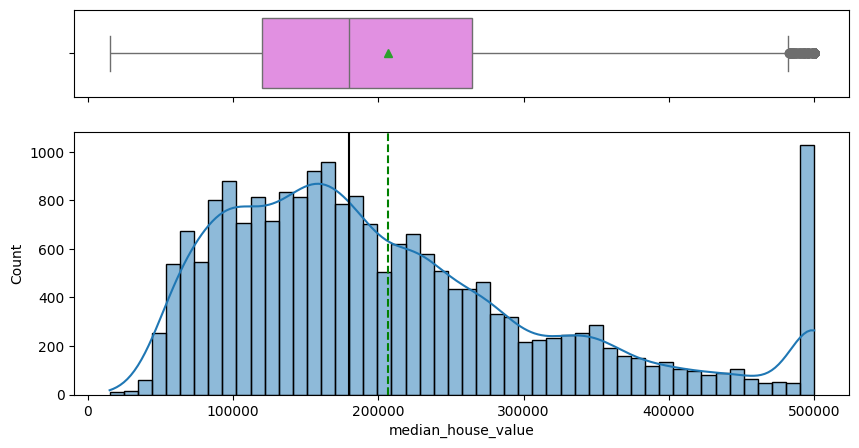

In [268]:
#creating a loop using the function to compare histogram and boxplot together for each of the numerical columns
for col in numeric_columns:
  histogram_boxplot(housing,col, bins=50, kde=True, figsize=(10, 5))
#adding more detialed visual for the skewed statements earlier as well as viewing outliers

In [269]:
#Creating a Labeled Barplot function to view the catagorical values


# Function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage or count labels on top of bars.

    Parameters:
    - data: DataFrame
    - feature: column name (categorical feature)
    - perc: whether to display percentages instead of count (default False)
    - n: number of top categories to display (default None = all)
    """
    total = len(data[feature])  # Total count for percentage calculations
    count = data[feature].nunique()  # Number of unique categories

    # Set figure size depending on number of categories to display
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)

    # Create the barplot
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values() if n else data[feature].value_counts().index.sort_values()
    )

    # Annotate each bar
    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            label = int(p.get_height())

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.show()


<ipython-input-269-0820896de8b3>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


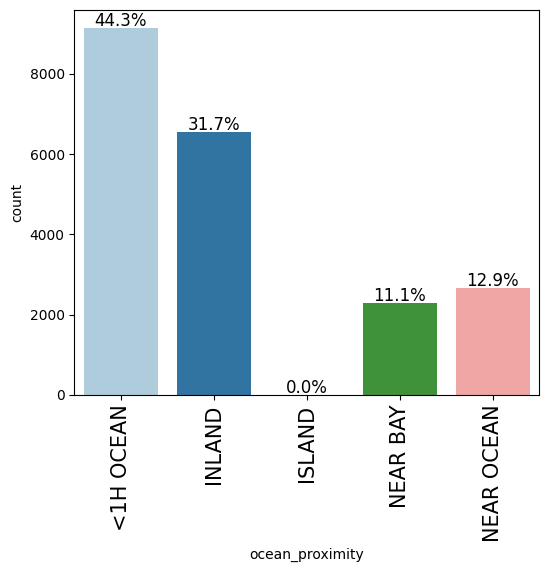

In [270]:
labeled_barplot(housing, "ocean_proximity", perc=True)

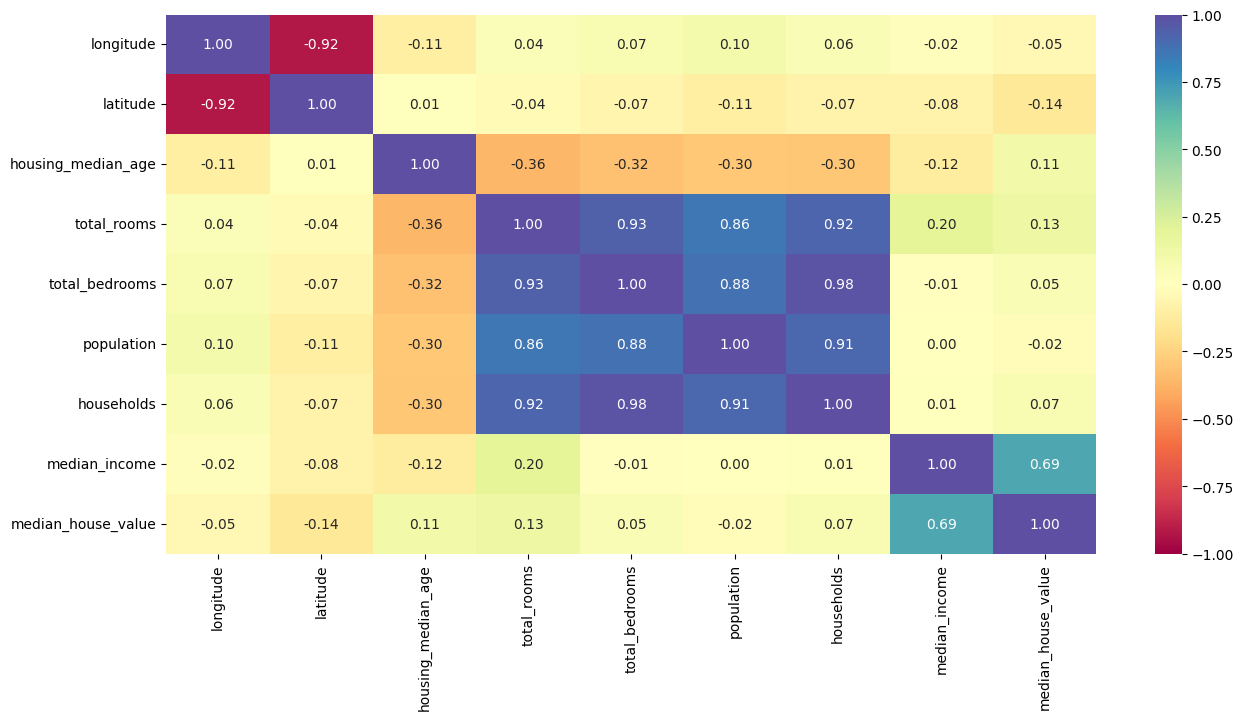

In [271]:
# check for correlations

plt.figure(figsize=(15, 7))
sns.heatmap(
    housing[numeric_columns].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()
#checking for correlation in this phase is important due to see which values may contribute more to the task at hand
#in this case while looking to predict median housing value, it seem to have the highest correlation to median income. It may do us well to catagorize our values by the median income

Preparing data for machine learning

In [272]:
import numpy as np
def split_train_test(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [273]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "training values +", len(test_set), "test values")

16512 training values + 4128 test values


In [274]:
#Earlier it was mentioned that the data does not have identifer rows, therefore we will use
import hashlib
#creating a hash for eachfor the idenfier, that has not been made yet.
def test_set_check(identifier, test_ratio, hash):
  return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio #this is going to turn the identifier into a hash

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
  ids = data[id_column] #pulls ids from id_column and lists them as ids
  in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash)) #applies previous function for creating a hash based on the identifier to each ID
  return data.loc[~in_test_set], data.loc[in_test_set] # this will split the data into test set and not in test set(training)

###Now we are able to split the data into a test and training set and the data in each group will be the same each time due to hashing.
Next the IDs for each row will be created.


In [275]:
housing_with_id = housing.reset_index() # adds index column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [276]:
#just checking out what the new data looks like
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Due to median income having the highest correlation (seen earlier on correlation heatmap) we will divide our population by median income levels in order to help tailor our data.


In [277]:
# The following code creates an income category
# attribute by dividing the median income by 1.5 (to limit the number of income categories)
#  and rounding up using ceil (to have discrete categories), and then merging
# all the categories greater than 5 into category 5:

#chose to do 1.5 due to the scale of median incomes and wanting to bring it down, ceil is to round to the nearest integer
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)

#if truly under cat 5 then it will keep the same value, if over 5 then it will return 5, also inplace=True modifies the orignal dataset not create a copy
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

<ipython-input-277-fa538ab68ec3>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)


Now, stratefied sampling will be performed on the dataset

In [278]:
from sklearn.model_selection import StratifiedShuffleSplit
#spliting the data into training and test
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
#the following will give us a training and test set that has the same distribution of income_cat in both sets
for train_index, test_index in split.split(housing, housing["income_cat"]):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]


In [279]:
#Viewing the percentage of each income catagory
housing["income_cat"].value_counts() / len(housing)

,count
income_cat,
3.0,0.350581
2.0,0.318847
4.0,0.176308
5.0,0.114438
1.0,0.039826


In [280]:
#Now that we have our test and training sets stratifed, we can drop the manufactured catagory to return the data to its orignal form
for set in (strat_train_set, strat_test_set):
  set.drop(["income_cat"], axis=1, inplace=True)

In [281]:
#creating a copy of the stratified training set
housing = strat_train_set.copy()

Text(0, 0.5, 'Latitude')

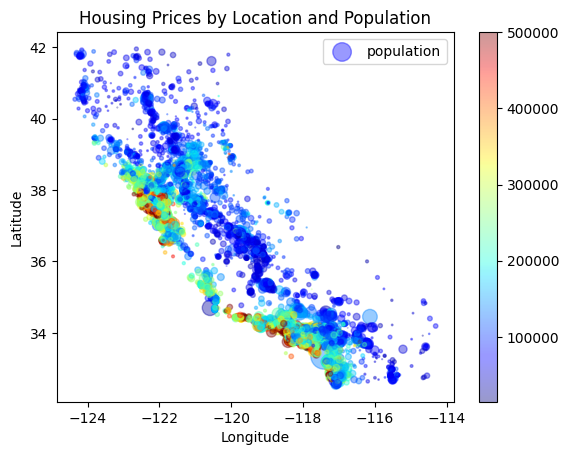

In [282]:
#Creating a scatterplot that shows us median house value adn where they are located
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population", #s stands for size of circle
c=housing["median_house_value"], cmap=plt.get_cmap("jet"), colorbar=True,#c stands for color
)
plt.legend()
plt.title("Housing Prices by Location and Population")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
# I notice alot of the more expensive houses are located near the coast.

#Looking for Corelation

In [283]:
#removing non-numerical values
housing1 = housing.drop(["ocean_proximity"],axis=1)

The highest correlation is with median income

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

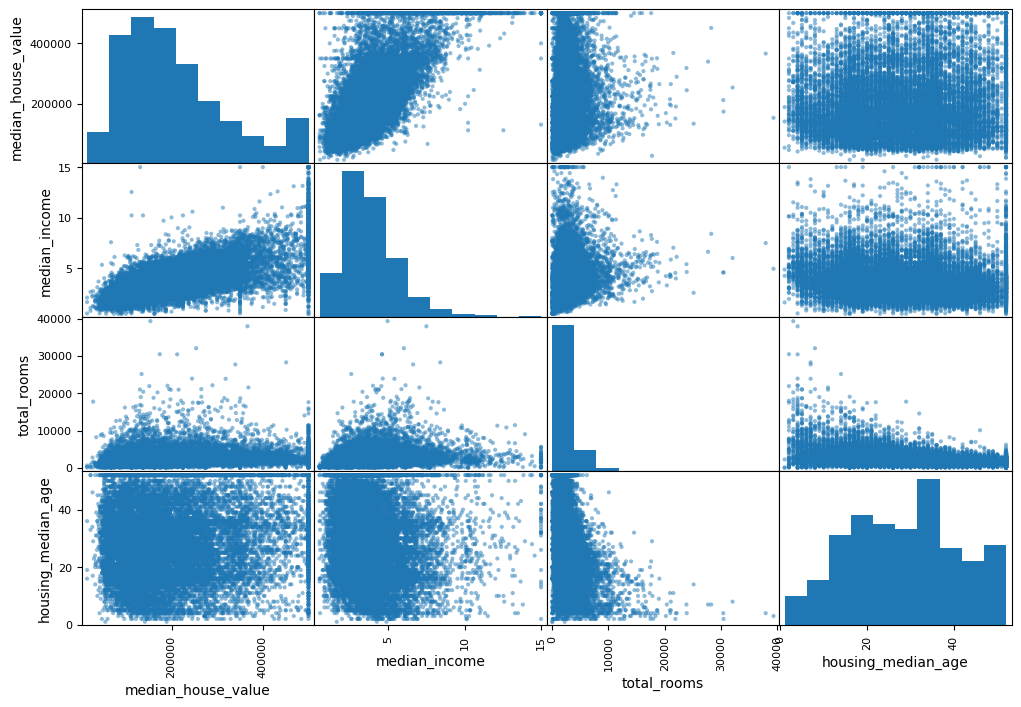

In [284]:
#Viewing the relatinship between the variables found in the dataset
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
  "housing_median_age"]
scatter_matrix(housing1[attributes], figsize=(12, 8)) #using the numeric data frame

#I noticed that median income has a very strong relationship visually with median house value

<Axes: xlabel='median_income', ylabel='median_house_value'>

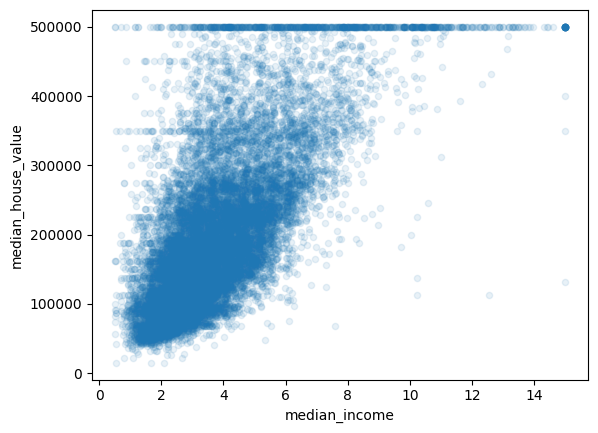

In [285]:
#specifically taking a look at this section
housing1.plot(kind="scatter", x="median_income", y="median_house_value",
  alpha=0.1)
#noticing there are alot of values at certain values no matter the median income( EX:500,000, ~350,000), will take note when reviewing model predictions

Preparing for machine learning

In [286]:
#Seperating our training set into X and Y values, predictior and predictions
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

Data Cleaning

In [287]:
# Creating an Imputer instance that inputs median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")


In [288]:
housing_num = housing.drop("ocean_proximity", axis=1) #dropping non-numerical columns

In [289]:
# Now you can fit the imputer instance to the training data using the fit() method:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [290]:
#Running a comparison to make sure the imputer brought the medians in for the messing values
print(imputer.statistics_)


print(housing_num.median().values)

[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]
[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]


In [291]:
# The imputer has simply computed the median of each attribute and stored the result
# Only the total_bedrooms attribute had missing values, though in order to combat future potential missing data we will apply imputer to all numerical values

# Fit the imputer to the training data
imputer.fit(housing_num)


# Transform the training data to replace missing values
imputed_data = imputer.transform(housing_num)

# Display the imputed data as an array
print(imputed_data)


[[-1.2146e+02  3.8520e+01  2.9000e+01 ...  2.2370e+03  7.0600e+02
   2.1736e+00]
 [-1.1723e+02  3.3090e+01  7.0000e+00 ...  2.0150e+03  7.6800e+02
   6.3373e+00]
 [-1.1904e+02  3.5370e+01  4.4000e+01 ...  6.6700e+02  3.0000e+02
   2.8750e+00]
 ...
 [-1.2272e+02  3.8440e+01  4.8000e+01 ...  4.5800e+02  1.7200e+02
   3.1797e+00]
 [-1.2270e+02  3.8310e+01  1.4000e+01 ...  1.2080e+03  5.0100e+02
   4.1964e+00]
 [-1.2214e+02  3.9970e+01  2.7000e+01 ...  6.2500e+02  1.9700e+02
   3.1319e+00]]


In [292]:
#Use this imputer to transform the training set by replacing missing values by the learned medians
X = imputer.transform(housing_num)
#The result is a plain Numpy array containing the transformed features. If you want to
#putting imputer results (in array form) back into the dataframe
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [293]:
#Now the catagorical variables will be changed into numerical values to be processed by the algorithm

In [294]:
#Assigning the classes to ocean proximity
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([1, 4, 1, ..., 0, 0, 1])

In [295]:
#Viewing which values correlated to which
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [296]:
#Converting the new-found numerical values into one hot vectors, binary values for each catagory.
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1)) #have to change the 1D array to a 2d one
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [297]:
#changing it to a dense array
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [298]:
#chaning the catagorical values into a dense array that seperates the catagories into binary values in one shot using labelbinarizer
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()#seperating the catagorical values into boolean values
housing_cat_1hot = encoder.fit_transform(housing_cat) #transforming the catagorical variables into the array
housing_cat_1hot

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [299]:
#Custom Transformations
#Reviewing different combinations of values to see if they can help contribute to helping the model
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]


##Custom Transformers PG64





In [300]:
from sklearn.base import BaseEstimator, TransformerMixin  # Importing necessary classes to create a custom transformer.
import numpy as np  # Importing NumPy for array manipulations.

# Define column indices for rooms, bedrooms, population, and household
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):  # Constructor to initialize the option for adding bedrooms per room. #this sets the option for inlcuding this calculation
        self.add_bedrooms_per_room = add_bedrooms_per_room  # Store the option in the object.

    def fit(self, X, y=None):  # Fit method required by scikit-learn transformers.
        return self  # In this case, there's no fitting necessary, so just return the transformer itself.

    def transform(self, X, y=None):  # Transform method to modify the dataset.
        # Create a new feature "rooms_per_household" by dividing the 'rooms' column by the 'household' column.
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]

        # Create a new feature "population_per_household" by dividing the 'population' column by the 'household' column.
        population_per_household = X[:, population_ix] / X[:, household_ix]

        # If the add_bedrooms_per_room flag is True, calculate the "bedrooms_per_room" feature.
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            # Concatenate the original features along with the new features (rooms_per_household, population_per_household, bedrooms_per_room).
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            # If add_bedrooms_per_room is False, only concatenate the "rooms_per_household" and "population_per_household" features.
            return np.c_[X, rooms_per_household, population_per_household]

# Create an instance of the transformer with the option to exclude "bedrooms_per_room".
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)

# Apply the transformation on the housing dataset (assuming 'housing.values' is a numpy array or similar structure).
housing_extra_attribs = attr_adder.transform(housing.values)


In [301]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  # Correct import for imputer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),  # Use SimpleImputer here
    ('attribs_adder', CombinedAttributesAdder()), #includes custom trasnformations from earlier
    ('std_scaler', StandardScaler()), #scales the data
])

#Below produces stored data that has no missing vlaues, the custom transformations and is scaled
housing_num_tr = num_pipeline.fit_transform(housing_num)


In [302]:
from sklearn.compose import ColumnTransformer
#Here we are creating a pipeline that tackles numerical and non-numerical values
from sklearn.pipeline import FeatureUnion

#viewing attributes
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

#numerical pipeline, explained in previous cell
num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('attribs_adder', CombinedAttributesAdder()),
('std_scaler', StandardScaler()),
])

#non-numerical pipeline, used to create 0 and 1 values for each catagory in ocean proximity
cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore')),  # Use OneHotEncoder instead of LabelBinarizer
])

#combining the two of them
full_pipeline = ColumnTransformer([
("num_pipeline", num_pipeline, num_attribs),
("cat_pipeline", cat_pipeline, cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [303]:
#reviewing the array
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [304]:
#checking the values
housing_prepared.shape

(16512, 16)

Selecting model

In [305]:
#Fitting Linear Regression model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [306]:
first_five_data = housing.iloc[:5] #choosing first five rows of predictors
first_five_labels = housing_labels.iloc[:5] #choosing first five rows of predictions
first_five_data_prepared = full_pipeline.transform(first_five_data) #putting the first five predictors through the pipeline
print("Predictions:\t", lin_reg.predict(first_five_data_prepared))
print("Labels:\t\t", list(first_five_labels))

Predictions:	 [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels:		 [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [307]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared) #using the linear model to make predictions
lin_mse = mean_squared_error(housing_labels, housing_predictions) #calculate the mean square error betwen the predictions and the labels
lin_rmse = np.sqrt(lin_mse) #getting the squre root of the mean square error
lin_rmse #score of square rooted mean square error

#produces a very high score, which is not ideal
#Therefore the linear regression mode may not be the best option

np.float64(68627.87390018745)

In [308]:
#Fitting Decision Tree Regressor Model
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [309]:
housing_predictions = tree_reg.predict(housing_prepared) #using the linear model to make predictions
tree_mse = mean_squared_error(housing_labels, housing_predictions)  #calculate the mean square error betwen the predictions and the labels
tree_rmse = np.sqrt(tree_mse) #getting the squre root of the mean square error
tree_rmse #score of square rooted mean square error

#score was a 0, but that means the model was overfit

np.float64(0.0)

In [310]:
#Cross Validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(
    tree_reg, #decision tree model
    housing_prepared, #features
    housing_labels, #housing prices
    scoring="neg_mean_squared_error", #use negative MSE as the scoring metric
    cv=10 #dividing data into ten sections to evaluate the model
    )
tree_rmse_scores = np.sqrt(-scores)

In [311]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)
#this score is greater than linear regression, therefore it is less reliable

Scores: [72683.61297235 70842.17251111 69642.99674978 71272.01298412
 70668.43841865 77843.25765679 72807.24767023 72905.86748533
 68004.57357095 70458.56543074]
Mean: 71712.87454500582
Standard deviation: 2505.9394288320177


In [312]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)



housing_predictions = forest_reg.predict(housing_prepared) #using the random forest model to make predictions
forest_mse = mean_squared_error(housing_labels, housing_predictions)  #calculate the mean square error betwen the predictions and the labels
forest_rmse = np.sqrt(forest_mse) #getting the squre root of the mean square error
forest_rmse #score of square rooted mean square error


#Cross Validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(
    forest_reg, #random forest model
    housing_prepared, #features
    housing_labels, #housing prices
    scoring="neg_mean_squared_error", #use negative MSE as the scoring metric
    cv=10 #dividing data into ten sections to evaluate the model
    )
forest_rmse_scores = np.sqrt(-scores)

display_scores(forest_rmse_scores)

Scores: [51275.67328654 48936.01081435 46576.37427067 52047.95752543
 47709.20985514 52078.72091499 52696.7539744  49790.30868504
 48574.93251641 54143.12455149]
Mean: 50382.906639446664
Standard deviation: 2308.4656049949836


In [313]:
#searching for the best parameters for the Random Forest model
from sklearn.model_selection import GridSearchCV
param_grid = [
  {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
  {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error')

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [314]:
#pulling the best parameters
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [315]:
#returns the model that performed the best with the values from best_params
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [316]:
#Gathering the top per
cvres = grid_search.cv_results_
#loop for every tested parameter combination
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
 print(np.sqrt(-mean_score), params)

64489.715085669384 {'max_features': 2, 'n_estimators': 3}
55641.46837177337 {'max_features': 2, 'n_estimators': 10}
52627.17319968041 {'max_features': 2, 'n_estimators': 30}
60302.45151439633 {'max_features': 4, 'n_estimators': 3}
52712.68687737124 {'max_features': 4, 'n_estimators': 10}
50714.68058200583 {'max_features': 4, 'n_estimators': 30}
58951.55653437313 {'max_features': 6, 'n_estimators': 3}
52507.82134029644 {'max_features': 6, 'n_estimators': 10}
49973.34148314361 {'max_features': 6, 'n_estimators': 30}
58693.78358253832 {'max_features': 8, 'n_estimators': 3}
52178.46563312783 {'max_features': 8, 'n_estimators': 10}
49759.03618685239 {'max_features': 8, 'n_estimators': 30}
63240.013703196266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54106.50745744829 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60124.20282556225 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52808.255444883966 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [317]:
#creating an array of the values that the model attaches to each variable
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.72792154e-02, 5.92886361e-02, 4.50359464e-02, 1.57091375e-02,
       1.46998375e-02, 1.47212928e-02, 1.45895938e-02, 3.62488043e-01,
       4.98948949e-02, 1.11990784e-01, 6.48157162e-02, 9.63261756e-03,
       1.63556149e-01, 1.23163358e-04, 2.11805480e-03, 4.05691754e-03])

In [318]:
#adding the variable column to the value previously calculated
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(np.float64(0.36248804272355445), 'median_income'),
 (np.float64(0.1635561492707113), np.str_('INLAND')),
 (np.float64(0.11199078410856643), 'pop_per_hhold'),
 (np.float64(0.06727921535751985), 'longitude'),
 (np.float64(0.0648157162258996), 'bedrooms_per_room'),
 (np.float64(0.059288636092293026), 'latitude'),
 (np.float64(0.04989489488031935), 'rooms_per_hhold'),
 (np.float64(0.04503594638711685), 'housing_median_age'),
 (np.float64(0.015709137543783218), 'total_rooms'),
 (np.float64(0.014721292795409496), 'population'),
 (np.float64(0.014699837523300096), 'total_bedrooms'),
 (np.float64(0.014589593839723226), 'households'),
 (np.float64(0.009632617555687431), np.str_('<1H OCEAN')),
 (np.float64(0.0040569175389743245), np.str_('NEAR OCEAN')),
 (np.float64(0.002118054799035177), np.str_('NEAR BAY')),
 (np.float64(0.00012316335810621173), np.str_('ISLAND'))]

In [319]:
#This is the comparison to the test dataset
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)
#This is the lowest RSME value we have recieved

47953.27612532072
